In [1]:
import numpy as np
import pandas as pd

#### 导入数据

In [2]:
data_file_path = "H:\\CnCqleeds\\data\Breast-Cancer\\"

In [3]:
df_train = pd.read_csv(data_file_path+"breast-cancer-train.csv")
df_test = pd.read_csv(data_file_path+"breast-cancer-test.csv")

In [5]:
df_test.head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,158,1,2,0
1,499,1,1,0
2,396,1,1,0
3,155,5,5,1
4,321,1,1,0


#### 特征选择，构建正负样本

In [11]:
feature_columns = ['Clump Thickness','Cell Size']
label_column = 'Type'

In [12]:
df_test_negative = df_test.loc[df_test[label_column]==0][feature_columns]
df_test_positive = df_test.loc[df_test[label_column]==1][feature_columns] 

#### 样本探索

In [13]:
import matplotlib.pyplot as plt

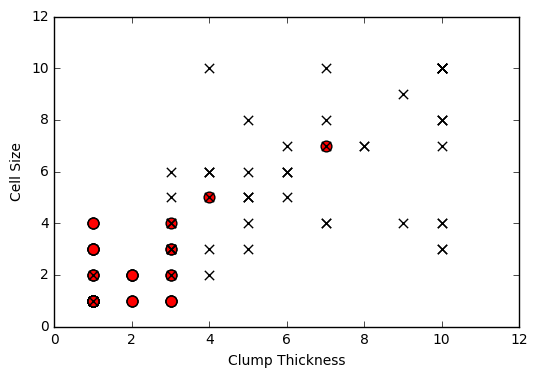

In [17]:
plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'],\
           marker='o',s=60,c='red')

plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'],\
           marker='x',s=45,c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()

#### 随机参数下的二分类器

In [28]:
b = np.random.random(1)

w = np.random.random(1)

In [29]:
x = np.arange(12)
y = w*x + b

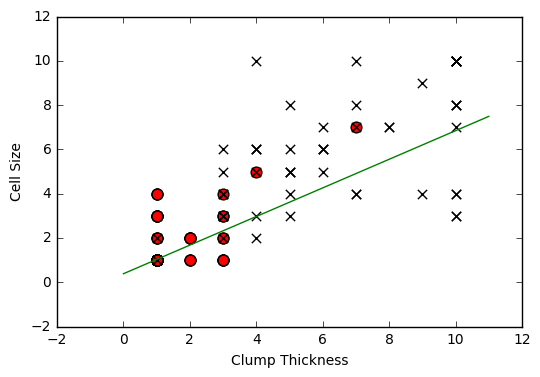

In [31]:
plt.plot(x,y,c='green')

plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'],\
           marker='o',s=60,c='red')

plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'],\
           marker='x',s=45,c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()

#### 使用sklearn机器学习包中的模型来训练分类器

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [36]:
# 训练
lr.fit(df_train[feature_columns][:10],df_train[label_column][:10])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# 评估
lr.score(df_test[feature_columns],df_test[label_column])

0.8685714285714285

#### 训练得到的参数

In [40]:
lr.intercept_

array([-1.51522787])

In [41]:
lr.coef_

array([[-0.10721332,  0.48314152]])

#### 可视化训练好的Logistics Regress

In [43]:
y = (-lr.intercept_ - x * lr.coef_[0,0]) / lr.coef_[0,1]

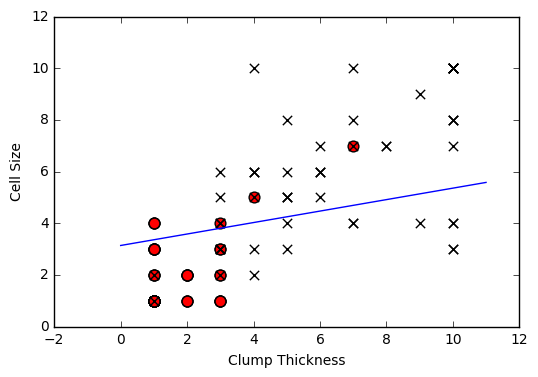

In [44]:
plt.plot(x,y,c='blue')

plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'],\
           marker='o',s=60,c='red')

plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'],\
           marker='x',s=45,c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()

#### 使用全部训练数据来训练

In [45]:
lr.fit(df_train[feature_columns],df_train[label_column])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y = (-lr.intercept_ - x * lr.coef_[0,0]) / lr.coef_[0,1]

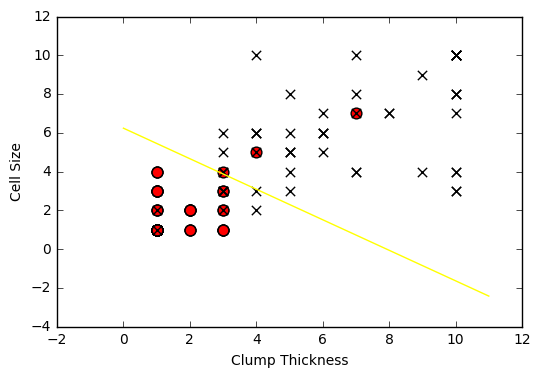

In [47]:
plt.plot(x,y,c='yellow')

plt.scatter(df_test_negative['Clump Thickness'], df_test_negative['Cell Size'],\
           marker='o',s=60,c='red')

plt.scatter(df_test_positive['Clump Thickness'], df_test_positive['Cell Size'],\
           marker='x',s=45,c='black')

plt.xlabel('Clump Thickness')
plt.ylabel('Cell Size')

plt.show()

In [48]:
# 评估
lr.score(df_test[feature_columns],df_test[label_column])

0.9371428571428572